# Information Retrieval using Vector Space Model 

In this notebook, we will use Vector Space Model (VSM) to do information retrieval and explore the fundamentals of text mining. <br />
The data can be found [here](https://www.kaggle.com/datasets/kanhataak/task-finding-semantic-textual-similarity/data).

In [29]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Text_Similarity_Dataset.csv')
df

,Unique_ID,text1,text2
0,0,savvy searchers fail to spot ads internet sear...,newcastle 2-1 bolton kieron dyer smashed home ...
1,1,millions to miss out on the net by 2025 40% o...,nasdaq planning $100m share sale the owner of ...
2,2,young debut cut short by ginepri fifteen-year-...,ruddock backs yapp s credentials wales coach m...
3,3,diageo to buy us wine firm diageo the world s...,mci shares climb on takeover bid shares in us ...
4,4,be careful how you code a new european directi...,media gadgets get moving pocket-sized devices ...
...,...,...,...
4018,4018,labour plans maternity pay rise maternity pay ...,no seasonal lift for house market a swathe of ...
4019,4019,high fuel costs hit us airlines two of the lar...,new media battle for bafta awards the bbc lead...
4020,4020,britons growing digitally obese gadget lover...,film star fox behind theatre bid leading actor...
4021,4021,holmes is hit by hamstring injury kelly holmes...,tsunami to hit sri lanka banks sri lanka s b...


# pre-processing

In [3]:
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('punkt')

lemmatizer = WordNetLemmatizer()

In [4]:
# make lower case
df['text1'] = df['text1'].apply(lambda x: x.lower())
df['text2'] = df['text2'].apply(lambda x: x.lower())

# remove digits
df['text1'] = df['text1'].map(lambda m: re.sub(r"\d", " ", m))
df['text2'] = df['text2'].map(lambda m: re.sub(r"\d", " ", m))

# remove punctuation (includes symbols)
pattern = r'[' + string.punctuation + ']'
df['text1'] = df['text1'].map(lambda m: re.sub(pattern, " ", m))
df['text2'] = df['text2'].map(lambda m: re.sub(pattern, " ", m))

# tokenize
df['text1'] = df['text1'].apply(lambda x: x.split())
df['text2'] = df['text2'].apply(lambda x: x.split())

# remove stopwords
sw = nltk.corpus.stopwords.words('english')
df['text1'] = df['text1'].apply(lambda x: [item for item in x if item not in sw])
df['text2'] = df['text2'].apply(lambda x: [item for item in x if item not in sw])

# lemmatize
df['text1'] = df['text1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
df['text2'] = df['text2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])

# remove empty tokens
df['text1'] = df['text1'].apply(lambda x: [item for item in x if item !=''])
df['text2'] = df['text2'].apply(lambda x: [item for item in x if item !=''])

# remove single letters
df['text1'] = df['text1'].apply(lambda x: [item for item in x if len(item) > 1])
df['text2'] = df['text2'].apply(lambda x: [item for item in x if len(item) > 1])

df

,Unique_ID,text1,text2
0,0,"[savvy, searcher, fail, spot, ad, internet, se...","[newcastle, bolton, kieron, dyer, smashed, hom..."
1,1,"[million, miss, net, uk, population, still, wi...","[nasdaq, planning, share, sale, owner, technol..."
2,2,"[young, debut, cut, short, ginepri, fifteen, y...","[ruddock, back, yapp, credential, wale, coach,..."
3,3,"[diageo, buy, wine, firm, diageo, world, bigge...","[mci, share, climb, takeover, bid, share, phon..."
4,4,"[careful, code, new, european, directive, coul...","[medium, gadget, get, moving, pocket, sized, d..."
...,...,...,...
4018,4018,"[labour, plan, maternity, pay, rise, maternity...","[seasonal, lift, house, market, swathe, figure..."
4019,4019,"[high, fuel, cost, hit, airline, two, largest,...","[new, medium, battle, bafta, award, bbc, lead,..."
4020,4020,"[briton, growing, digitally, obese, gadget, lo...","[film, star, fox, behind, theatre, bid, leadin..."
4021,4021,"[holmes, hit, hamstring, injury, kelly, holmes...","[tsunami, hit, sri, lanka, bank, sri, lanka, b..."


# EDA

In [5]:
stack1 = df['text1'].apply(pd.Series).stack()
stack2 = df['text2'].apply(pd.Series).stack()
stacked = pd.concat([stack1, stack2]).str.cat(sep=' ')

In [6]:
stacked[:100]

'savvy searcher fail spot ad internet search engine user odd mix naive sophisticated suggests report '

(-0.5, 699.5, 349.5, -0.5)

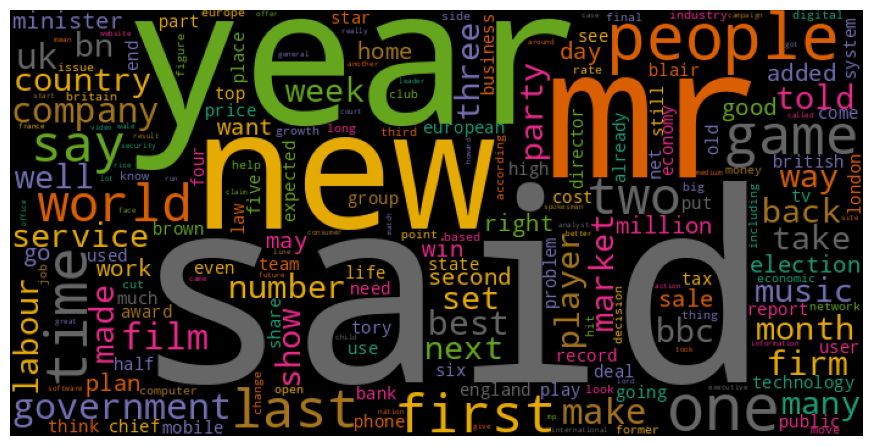

In [7]:
# word cloud with both columns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_cloud = WordCloud(width=700, height=350, colormap="Dark2", collocations=False).generate(stacked)
plt.figure(figsize=(11,7))
plt.imshow(word_cloud)
plt.axis("off")

<AxesSubplot:>

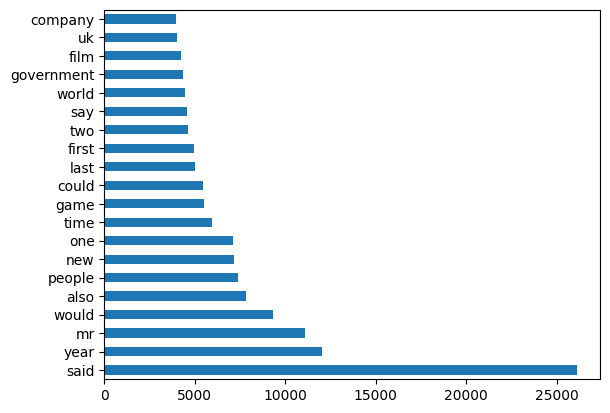

In [8]:
# frequency distribution
pd.concat([stack1, stack2]).value_counts()[:20].plot(kind='barh')

# Similarity between columns

The original dataset is used to compare the similarity between columns.
We will do that and then we will use some of the entries to used as query vectors.

In [9]:
# detokenize (join)
df['text1'] = df['text1'].apply(lambda x: ' '.join(x))
df['text2'] = df['text2'].apply(lambda x: ' '.join(x))
df

,Unique_ID,text1,text2
0,0,savvy searcher fail spot ad internet search en...,newcastle bolton kieron dyer smashed home winn...
1,1,million miss net uk population still without i...,nasdaq planning share sale owner technology do...
2,2,young debut cut short ginepri fifteen year old...,ruddock back yapp credential wale coach mike r...
3,3,diageo buy wine firm diageo world biggest spir...,mci share climb takeover bid share phone compa...
4,4,careful code new european directive could put ...,medium gadget get moving pocket sized device l...
...,...,...,...
4018,4018,labour plan maternity pay rise maternity pay n...,seasonal lift house market swathe figure provi...
4019,4019,high fuel cost hit airline two largest airline...,new medium battle bafta award bbc lead nominat...
4020,4020,briton growing digitally obese gadget lover hu...,film star fox behind theatre bid leading actor...
4021,4021,holmes hit hamstring injury kelly holmes force...,tsunami hit sri lanka bank sri lanka bank face...


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [11]:
similarity = []
for i, j in zip(df['text1'], df['text2']):
    docs = (i, j)
    matrix = TfidfVectorizer().fit_transform(docs)
    cosine_sim = cosine_similarity(matrix[0], matrix[1])
    similarity.append(cosine_sim)

df['Similarity'] = similarity

In [12]:
df

,Unique_ID,text1,text2,Similarity
0,0,savvy searcher fail spot ad internet search en...,newcastle bolton kieron dyer smashed home winn...,[[0.03197829363188224]]
1,1,million miss net uk population still without i...,nasdaq planning share sale owner technology do...,[[0.0334292655363747]]
2,2,young debut cut short ginepri fifteen year old...,ruddock back yapp credential wale coach mike r...,[[0.057382425433443775]]
3,3,diageo buy wine firm diageo world biggest spir...,mci share climb takeover bid share phone compa...,[[0.06659303696405561]]
4,4,careful code new european directive could put ...,medium gadget get moving pocket sized device l...,[[0.07311152127764377]]
...,...,...,...,...
4018,4018,labour plan maternity pay rise maternity pay n...,seasonal lift house market swathe figure provi...,[[0.0757845176806567]]
4019,4019,high fuel cost hit airline two largest airline...,new medium battle bafta award bbc lead nominat...,[[0.03288384075570983]]
4020,4020,briton growing digitally obese gadget lover hu...,film star fox behind theatre bid leading actor...,[[0.08139485314379248]]
4021,4021,holmes hit hamstring injury kelly holmes force...,tsunami hit sri lanka bank sri lanka bank face...,[[0.029707098155709443]]


# Information retrieval

Now we will use text1 column as query and text2 as the corpus.

In [17]:
# convert text2 column into vector
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(df['text2'])
vectorized_corpus = tfidf_vect.transform(df['text2'])
vectorized_corpus

<4023x24709 sparse matrix of type '<class 'numpy.float64'>'
	with 595129 stored elements in Compressed Sparse Row format>

In [18]:
# convert text1 column into vector
vectorized_queries = tfidf_vect.transform(df['text1'])
vectorized_queries

<4023x24709 sparse matrix of type '<class 'numpy.float64'>'
	with 593748 stored elements in Compressed Sparse Row format>

In [36]:
cosine_similarity(vectorized_queries[:4], vectorized_corpus)

array([[0.02446841, 0.00865508, 0.0134805 , ..., 0.01695603, 0.01172967,
        0.01829554],
       [0.02440863, 0.03222904, 0.02731583, ..., 0.03495902, 0.01953355,
        0.02602969],
       [0.03567627, 0.00605657, 0.04129942, ..., 0.03894093, 0.00560806,
        0.02968595],
       [0.00476884, 0.02326153, 0.00471402, ..., 0.0191311 , 0.0167468 ,
        0.00658273]])

In [41]:
# np.sort sorts the array in ascending order, with flip, we are sorting the array in descending order
np.flip(np.sort(cosine_similarity(vectorized_queries[:4], vectorized_corpus), axis=1), axis=1)[:, :5]

array([[1.        , 1.        , 1.        , 0.4990077 , 0.4990077 ],
       [1.        , 1.        , 1.        , 1.        , 0.2928125 ],
       [1.        , 0.31116205, 0.25677757, 0.25677757, 0.24497021],
       [1.        , 1.        , 0.2361158 , 0.2361158 , 0.15873608]])

Now, it would be nice to know the arguments that correspond to the cosine similarity of 1.

In [44]:
np.flip(np.argsort(cosine_similarity(vectorized_queries[:4], vectorized_corpus), axis=1), axis=1)

array([[1849, 2590, 2937, ..., 2123,  227, 2633],
       [2612,  355, 1935, ..., 3337, 2156, 1296],
       [1996, 3447, 2420, ..., 1130, 2170, 2116],
       [2175,  691, 2130, ..., 1398, 3097, 2675]])

In [45]:
df['text2'].iloc[1849]

'savvy searcher fail spot ad internet search engine user odd mix naive sophisticated suggests report search habit report pew research center reveals searcher usually find looking using search engine also show spot difference paid result organic one report reveals net user say regularly use google ask jeeves msn yahoo online almost questioned said would trust search engine much le knew information paid result hidden according figure gathered pew researcher average user spends minute per month carrying separate search look webpage hunt significant chunk net user carry search least weekly asked look every week questioned information looking critical information simply find search engine user also tend loyal found site feel trust tend stick according pew research searcher use single search engine use two three small number consult three site tony macklin spokesman ask jeeves said result reflected research showed people use different search engine way site gather information mean provide di

In [46]:
df['text1'].iloc[0]

'savvy searcher fail spot ad internet search engine user odd mix naive sophisticated suggests report search habit report pew research center reveals searcher usually find looking using search engine also show spot difference paid result organic one report reveals net user say regularly use google ask jeeves msn yahoo online almost questioned said would trust search engine much le knew information paid result hidden according figure gathered pew researcher average user spends minute per month carrying separate search look webpage hunt significant chunk net user carry search least weekly asked look every week questioned information looking critical information simply find search engine user also tend loyal found site feel trust tend stick according pew research searcher use single search engine use two three small number consult three site tony macklin spokesman ask jeeves said result reflected research showed people use different search engine way site gather information mean provide di

Well, it looks like some of the entries are repeated.